In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-trials-in-the-united-statese/countyData.csv
/kaggle/input/cancer-trials-in-the-united-statese/matrix_spc .png
/kaggle/input/cancer-trials-in-the-united-statese/fullData.csv
/kaggle/input/cancer-trials-in-the-united-statese/data_dict.csv
/kaggle/input/cancer-trials-in-the-united-statese/inc_percaptrials.png
/kaggle/input/cancer-trials-in-the-united-statese/cen_income.csv
/kaggle/input/cancer-trials-in-the-united-statese/inc_trials.png
/kaggle/input/cancer-trials-in-the-united-statese/inc_death.png
/kaggle/input/cancer-trials-in-the-united-statese/doc.docx
/kaggle/input/cancer-trials-in-the-united-statese/incd_r.csv
/kaggle/input/cancer-trials-in-the-united-statese/pov_death.png
/kaggle/input/cancer-trials-in-the-united-statese/inc_incidence.png
/kaggle/input/cancer-trials-in-the-united-statese/extract_zips_10.py
/kaggle/input/cancer-trials-in-the-united-statese/study_fields.csv
/kaggle/input/cancer-trials-in-the-united-statese/fips_zip_x.csv
/kaggle/input/cancer-tri

In [2]:
df = pd.read_csv('/kaggle/input/cancer-trials-in-the-united-statese/fullData.csv')
df.head()
# full data is the file I will clean and visualize, first need to drop the zip codes, index, countycode, county 
# then clean out duplicate rows
df.drop(columns=['index','zipCode','countyCode','studyCount','County','Name'], inplace=True)


In [3]:
df = df.drop_duplicates()

In [4]:
# df.reset_index(inplace=True)
# df.drop(columns=['level_0','index'],inplace=True)
# recTrend is the cancer mortality recent trend
# recentTrend is cancer incidence recent trend
# looks like this dataset is ripe for seaborn visual analysis

In [5]:
#df_dict = pd.read_csv('/kaggle/input/cancer-trials-in-the-united-statese/data_dict.csv')
#df_dict
# Columns need more descriptive names

In [6]:
df.rename(columns={'PovertyEst':'poverty_pop', 'recentTrend':'inc_recent_trend','fiveYearTrend':'inc_five_year_trend','deathRate':'death_per_k',
                  'recTrend':'cx_mort_recent_trend'}, inplace=True)
df.columns

Index(['State', 'poverty_pop', 'povertyPercent', 'medIncome', 'popEst2015',
       'incidenceRate', 'avgAnnCount', 'inc_recent_trend',
       'inc_five_year_trend', 'countyName', 'death_per_k', 'avgDeathsPerYear',
       'cx_mort_recent_trend'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

seaborn charts I want to try:
1) scatter
2) displot
3) boxplot
4) catplot
5) violinplot
6) histplot
7) stripplot
8) jointgrid
9) relplot
10) pairplot

In [8]:
df.describe().round(2)
# the describe gives a lot of ideas of data distribution to visualize
# first one is the poverty population IQR per state

,poverty_pop,povertyPercent,medIncome,popEst2015,incidenceRate,avgAnnCount,death_per_k,avgDeathsPerYear
count,3072.00,3072.00,3072.00,3072.00,3072.00,3072.00,3072.00,3072.00
mean,15679.78,16.87,47091.27,104546.96,448.29,612.50,178.62,187.77
std,56146.75,6.41,12079.96,332595.92,54.48,1422.85,27.73,506.49
min,91.00,3.20,22640.00,827.00,201.30,6.00,59.70,3.00
25%,1889.50,12.18,38876.25,11739.00,420.48,76.00,161.20,28.00
50%,4435.50,15.90,45201.00,26932.00,453.55,173.00,178.15,62.00
75%,10865.50,20.40,52509.25,69715.00,480.90,522.25,195.20,150.00
max,1863025.00,47.40,125635.00,10170292.00,1206.90,38150.00,362.80,14010.00


*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, 

BOXPLOT
x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None

<AxesSubplot:xlabel='State', ylabel='povertyPercent'>

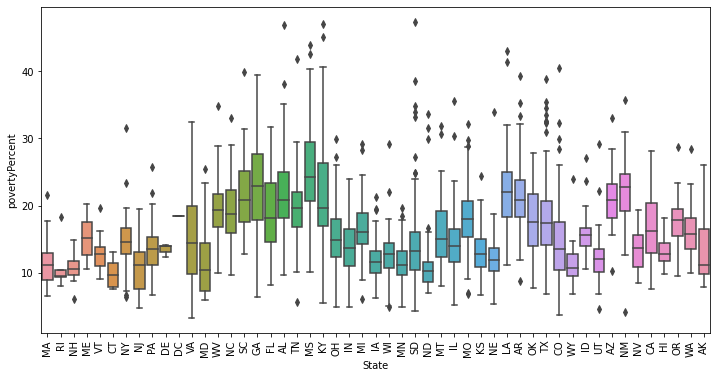

In [9]:
# boxplot for poverty IQR by state
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.boxplot(x='State', y='povertyPercent', data=df)
# I want to order this by the mean poverty percent by state

If I created quartiles for which states had the highest avg poverty, I bet you wouldn't be surprised

In [10]:
pov_order = df.groupby(by='State').povertyPercent.mean().sort_values().index

<AxesSubplot:xlabel='State', ylabel='povertyPercent'>

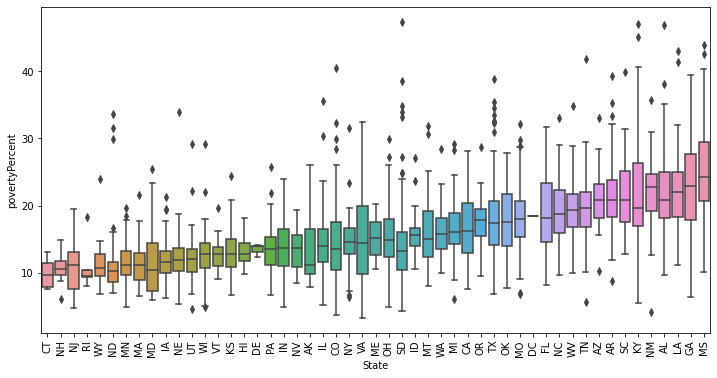

In [11]:
# boxplot for poverty IQR by state
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.boxplot(x='State', y='povertyPercent', data=df, order=pov_order)
# I want to add a label for the quartile poverty percent the county is in nationally

In [12]:
# how do I add the ntile for a value
# df['Quantile_rank'] = pd.qcut(df['Score'], 4,labels = False)
df['poverty_quartiles'] = pd.qcut(df['povertyPercent'], 4, labels=False)
# this is the county quartile, I need the state quartile

In [13]:
state_poverty = pd.qcut(df.groupby(by='State').povertyPercent.mean(), 4, labels=False)

In [14]:
state_poverty = pd.DataFrame(state_poverty)
# making the series into a dataframe to rejoin back into data for state poverty ranking

In [15]:
# renaming column for rejoining to main dataframe
state_poverty.rename(columns={'povertyPercent':'state_poverty_quartile'}, inplace=True)

In [16]:
df = df.merge(state_poverty, how='inner', on='State')
#df.drop(columns='state_poverty_quartile', inplace=True)

<AxesSubplot:xlabel='State', ylabel='povertyPercent'>

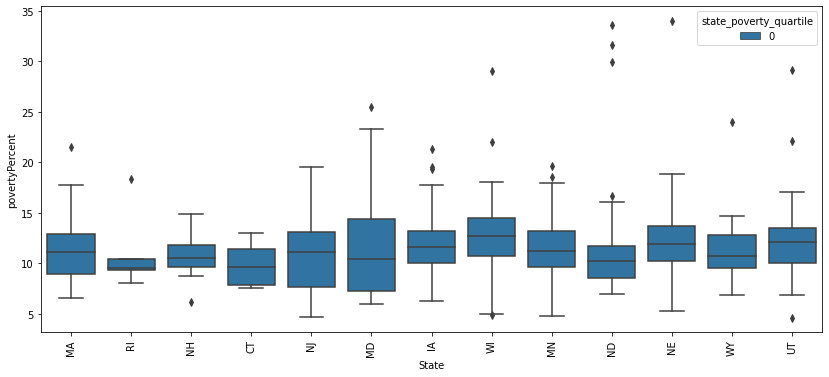

In [17]:
# boxplot for poverty IQR by state
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sns.boxplot(x='State', y='povertyPercent', hue='state_poverty_quartile', 
            data=df[df.state_poverty_quartile == 0])

<AxesSubplot:xlabel='State', ylabel='povertyPercent'>

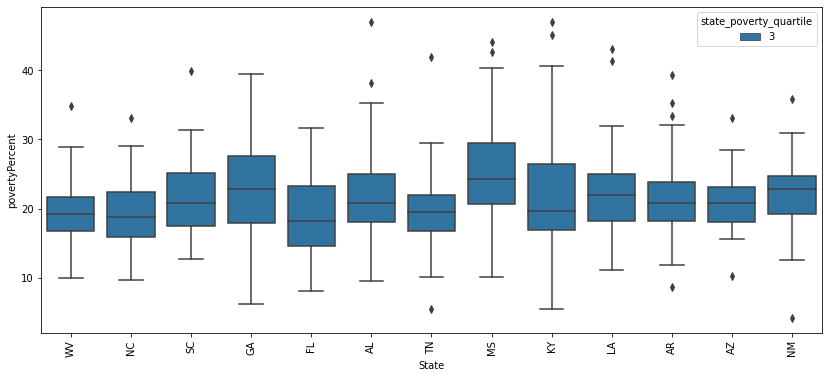

In [18]:
# boxplot for poverty IQR by state
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sns.boxplot(x='State', y='povertyPercent', hue='state_poverty_quartile', 
            data=df[df.state_poverty_quartile == 3])

g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

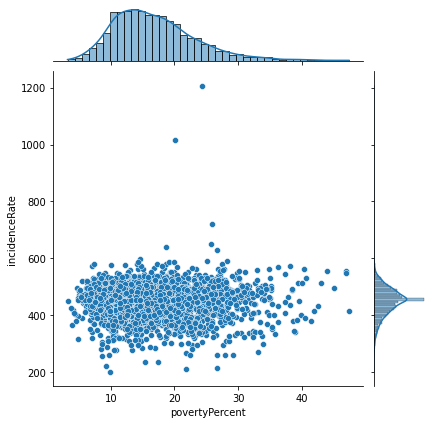

In [19]:
# I can do much more with this data set, I added calculations onto it to give extra valu
g = sns.JointGrid(data=df, x='povertyPercent',y='incidenceRate')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, kde=True)

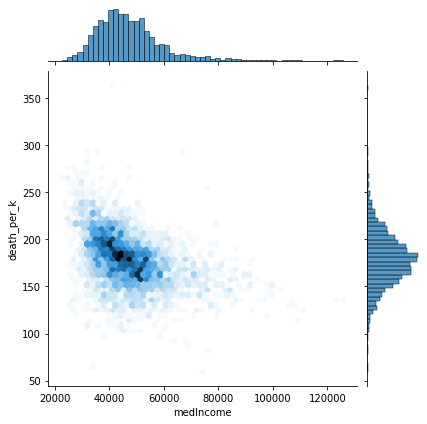

In [20]:
df.describe()
sns.jointplot(data=df, x='medIncome',y='death_per_k', kind='hex')
# this is simpler, but I like the other one better


In [21]:
# hypothesis list would help guide graph creation